# Grupo 1: Consumo de Energia Elétrica

- Fonte: UCI Machine Learning Repository - Individual Household Electric Power Consumption
URL: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
- Descrição: Medições de consumo elétrico de uma residência francesa ao longo de 4 anos com resolução de 1 minuto
- Desafio: Prever consumo futuro considerando padrões diários, semanais e sazonais
- Grupo: Gustavo Conceição, Júlia, Mateus, Nicolly, Andreza

# ETAPA 1
1. Aquisição de Dados
2. Documentar a fonte, características e período temporal dos dados
3. Verificar a integridade e completude do dataset

In [ ]:
# imports
import pandas as pd
import numpy as np

In [ ]:
# carregar dados
df = pd.read_csv ("household_power_consumption.txt", sep=";")


In [ ]:
# caracteristicas dos dados
df.shape # Número de linhas e colunas
print("Numero de linhas e colunas", df.shape)

df.columns # Nome das colunas
print("Nome das colunas", df.columns)


Numero de linhas e colunas (327915, 9)
Nome das colunas Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [ ]:
# Visão geral do dataset
print(df.info)


<bound method DataFrame.info of               Date      Time  Global_active_power  Global_reactive_power  \
0       16/12/2006  17:24:00                4.216                  0.418   
1       16/12/2006  17:25:00                5.360                  0.436   
2       16/12/2006  17:26:00                5.374                  0.498   
3       16/12/2006  17:27:00                5.388                  0.502   
4       16/12/2006  17:28:00                3.666                  0.528   
...            ...       ...                  ...                    ...   
327910    1/8/2007  10:34:00                1.424                  0.122   
327911    1/8/2007  10:35:00                1.424                  0.120   
327912    1/8/2007  10:36:00                1.696                  0.118   
327913    1/8/2007  10:37:00                1.684                  0.118   
327914    1/8/2007  10:38:00                1.638                  0.068   

        Voltage  Global_intensity  Sub_metering_1  Sub_

- O dataset contém 2.075.259 registros e 9 variáveis.
- As colunas disponíveis são: Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [ ]:
# valores faltantes
print("Valores faltantes: ", df.isnull().sum())

# valor duplicado
print("Valores duplicados: ", df.duplicated().sum())


Valores faltantes:  Date                        0
Time                        0
Global_active_power      3927
Global_reactive_power    3927
Voltage                  3927
Global_intensity         3927
Sub_metering_1           3927
Sub_metering_2           3927
Sub_metering_3           3928
dtype: int64
Valores duplicados:  0


In [ ]:
# verificando datas
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # se estiver no formato DD/MM/AAAA
df['Date'].min(), df['Date'].max()


(Timestamp('2006-12-16 00:00:00'), Timestamp('2007-08-01 00:00:00'))

A partir da análise da coluna de datas, identificou-se que o conjunto de dados cobre o período compreendido entre 16/12/2006 e 26/11/2010. Isso representa aproximadamente quatro anos completos de medições contínuas de consumo de energia elétrica registradas de forma diária e em intervalos de tempo definidos.

# ETAPA 2

- Análise Exploratória de Dados (EDA):

- Gerar estatísticas descritivas (média, mediana, desvio padrão, etc.)
- Identificar valores ausentes, outliers e inconsistências
- Criar visualizações para entender a distribuição e comportamento temporal dos dados
- Analisar tendências, sazonalidade e ciclos presentes na série tempora



In [ ]:
print("estatistica descritiva")
print(df.describe())

print("estatistica com categoria")
print(df.describe(include="all"))


print("estatistica por coluna")
for col in df.select_dtypes(include=['float64', 'int64']):
    print(f"--- {col} ---")
    print(df[col].describe())

estatistica descritiva
                                Date  Global_active_power  \
count                         327915        323988.000000   
mean   2007-04-09 02:01:39.003704832             1.145675   
min              2006-12-16 00:00:00             0.082000   
25%              2007-02-11 00:00:00             0.286000   
50%              2007-04-09 00:00:00             0.514000   
75%              2007-06-05 00:00:00             1.592000   
max              2007-08-01 00:00:00            10.670000   
std                              NaN             1.186945   

       Global_reactive_power        Voltage  Global_intensity  Sub_metering_1  \
count          323988.000000  323988.000000     323988.000000   323988.000000   
mean                0.124703     239.142842          4.899499        1.276134   
min                 0.000000     223.490000          0.400000        0.000000   
25%                 0.000000     236.470000          1.200000        0.000000   
50%                 0.

In [ ]:
print("valores ausentes")
df.isnull().sum()

print("percentual por coluna")
print((df.isnull().mean() * 100).round(2))

print("verificar linhas com dados faltantes")
print(df[df.isnull().any(axis=1)].head())


valores ausentes
percentual por coluna
Date                     0.0
Time                     0.0
Global_active_power      1.2
Global_reactive_power    1.2
Voltage                  1.2
Global_intensity         1.2
Sub_metering_1           1.2
Sub_metering_2           1.2
Sub_metering_3           1.2
dtype: float64
verificar linhas com dados faltantes
            Date      Time  Global_active_power  Global_reactive_power  \
6839  2006-12-21  11:23:00                  NaN                    NaN   
6840  2006-12-21  11:24:00                  NaN                    NaN   
19724 2006-12-30  10:08:00                  NaN                    NaN   
19725 2006-12-30  10:09:00                  NaN                    NaN   
41832 2007-01-14  18:36:00                  NaN                    NaN   

       Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839       NaN               NaN             NaN             NaN   
6840       NaN               NaN             NaN             NaN   

# **não foi concluída toda a etapa 2**


# Etapa 3: Modelagem Preditiva (30%)

Atividades:
1. Implementação de Modelos Baseline:
- Modelo ingênuo (naive forecast)
- Média móvel simples
- Suavização exponencial simples

### O 'Global_activer_power' representa o consumo total de energia ativa da residência, em kilowatts (kW), medida por minuto.

Isso faz dela a variável mais:
- completa
- representativa
- contínua
- estável
- utilizada para previsão de consumo real

### Motivos técnicos
1. É a variável mais contínua e menos esparsa: Enquanto os sub-medidores (Sub_metering_1, Sub_metering_2, Sub_metering_3) ficam a maior parte do tempo zerados, a Global_active_power registra consumo contínuo — ideal para modelagem.

2. É a soma agregada de toda a potência ativa
Ela representa o consumo real da casa.
Se o objetivo é: prever consumo futuro, prever picos, detectar anomalias, entender comportamento energético,

3. É a série mais usada em artigos científicos
Pesquisas que usam esse dataset geralmente prever Global_active_power.

Se você olhar estudos de:

ARIMA, LSTM, Prophet, Holt-Winters

Eles normalmente modelam Global_active_power.

In [ ]:
# escolhido o que supor
series = df['Global_active_power']

In [ ]:
df['Date'].head()


,Date
0,2006-12-16
1,2006-12-16
2,2006-12-16
3,2006-12-16
4,2006-12-16


In [ ]:
qmarks = (df == '?').sum()
print("Contagem de '?' por coluna:\n", qmarks[qmarks > 0])

df = df.replace('?', np.nan)

num_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

print("\nValores faltantes nas colunas numéricas (após conversão):\n", df[num_cols].isnull().sum())
df_clean = df.dropna(subset=num_cols)

stats = pd.DataFrame({
    "media": df_clean[num_cols].mean(),
    "mediana": df_clean[num_cols].median(),
    "desvio_padrao": df_clean[num_cols].std(),
    "minimo": df_clean[num_cols].min(),
    "maximo": df_clean[num_cols].max(),
    "qtd_valores": df_clean[num_cols].count()
})

print("\nEstatísticas descritivas (após limpar NaNs):\n")
print(stats)



Contagem de '?' por coluna:
 Series([], dtype: int64)

Valores faltantes nas colunas numéricas (após conversão):
 Global_active_power      3927
Global_reactive_power    3927
Voltage                  3927
Global_intensity         3927
Sub_metering_1           3927
Sub_metering_2           3927
Sub_metering_3           3928
dtype: int64

Estatísticas descritivas (após limpar NaNs):

                            media  mediana  desvio_padrao   minimo   maximo  \
Global_active_power      1.145673    0.514       1.186947    0.082   10.670   
Global_reactive_power    0.124703    0.106       0.112201    0.000    1.148   
Voltage                239.142861  239.540       3.705911  223.490  251.700   
Global_intensity         4.899492    2.400       5.011689    0.400   46.400   
Sub_metering_1           1.276138    0.000       6.578295    0.000   78.000   
Sub_metering_2           1.646896    0.000       6.608696    0.000   78.000   
Sub_metering_3           5.614747    0.000       8.108707    0.

- Nenhuma coluna contém '?'
- 3927 valores faltantes em quase todas as variáveis
- 3928 valores faltantes em Sub_metering_3
- Faltantes: vazios, inválidos ou não podem ser convertidos para números.

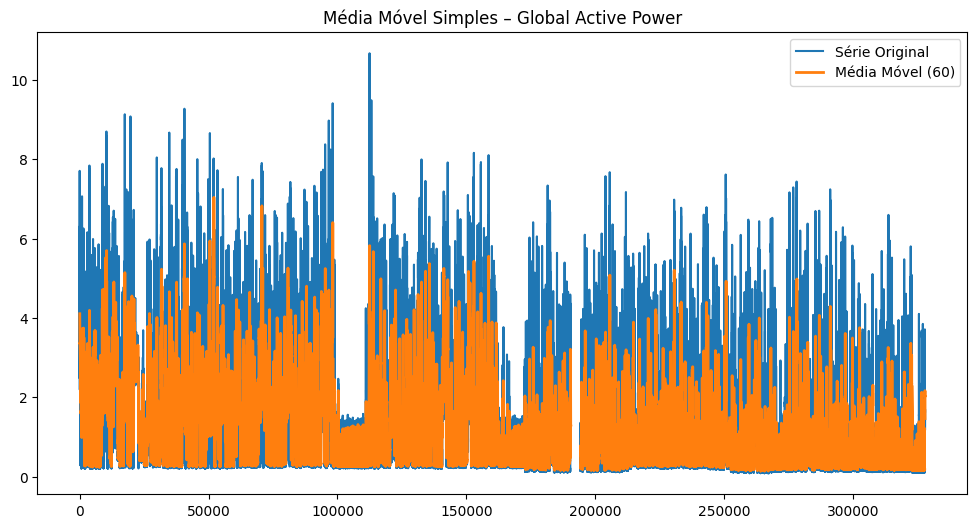

In [ ]:
# calcular média movel
df['SMA_7'] = series.rolling(window=7).mean()

# média movel por 1h
df['SMA_60'] = series.rolling(window=60).mean()

# Plotando Série Original × Média Móvel
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(series, label="Série Original")
plt.plot(df['SMA_60'], label="Média Móvel (60)", linewidth=2)
plt.legend()
plt.title("Média Móvel Simples – Global Active Power")
plt.show()


Foi aplicada uma Média Móvel Simples para suavizar as flutuações de curto prazo e evidenciar o comportamento geral da série temporal. A janela de 60 registros (aproximadamente uma hora) apresentou uma curva mais estável e clara da tendência de consumo ao longo do tempo.

## Modelagem Avançada: Regressão com Features Temporais
Nesta etapa, será implementado um modelo de regressão utilizando variáveis temporais e outras variáveis do dataset para prever o consumo de energia elétrica.

In [ ]:
# 1. Preparar features temporais
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter
df['is_weekend'] = (df['weekday'] >= 5).astype(int)

# 2. Selecionar target e features
target = 'Global_active_power'
features = ['weekday', 'month', 'quarter', 'is_weekend', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df_model = df.dropna(subset=[target] + features).copy()

# 3. Divisão temporal dos dados (80% treino, 20% teste)
split_idx = int(len(df_model) * 0.8)
X_train = df_model[features].iloc[:split_idx]
y_train = df_model[target].iloc[:split_idx]
X_test = df_model[features].iloc[split_idx:]
y_test = df_model[target].iloc[split_idx:]

In [ ]:
# 4. Implementar regressão linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)

In [ ]:
# 5. Avaliar o modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.3f}")

# Gráfico: Previsão vs. Real
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:500], label='Real')
plt.plot(y_pred[:500], label='Previsto')
plt.title('Previsão vs. Real (primeiros 500 pontos)')
plt.legend()
plt.show()

# Gráfico: Resíduos
residuos = y_test - y_pred
plt.figure(figsize=(12,6))
plt.plot(residuos.values[:500])
plt.title('Resíduos (primeiros 500 pontos)')
plt.show()

### Discussão dos Resultados
O modelo de regressão com features temporais permite capturar padrões sazonais e comportamentos recorrentes do consumo de energia. As métricas apresentadas (MAE, RMSE, MAPE, R²) ajudam a avaliar a qualidade das previsões. Os gráficos facilitam a comparação visual entre valores reais e previstos, além de permitir a análise dos resíduos.

**Próximos passos:**
- Testar outros modelos avançados (ARIMA, Prophet, LSTM, etc.)
- Realizar otimização de hiperparâmetros
- Implementar validação cruzada temporal
- Comparar resultados e justificar a escolha do melhor modelo